<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/keras)_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]


17465344/17464789 [==============================] - 0s 0us/step


In [4]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [5]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

In [7]:
model = Sequential()

model.add(Embedding(1000, 32)) 
model.add(LSTM(8))
# simple rnn 층만 lstm으로 변경
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_seq, y_train, epochs=10, batch_size=32,
                    validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 19s 31ms/step - loss: 0.4446 - accuracy: 0.7952 - val_loss: 0.3704 - val_accuracy: 0.8410
Epoch 2/10
625/625 [==============================] - 19s 31ms/step - loss: 0.3343 - accuracy: 0.8601 - val_loss: 0.3592 - val_accuracy: 0.8434
Epoch 3/10
625/625 [==============================] - 19s 30ms/step - loss: 0.3102 - accuracy: 0.8709 - val_loss: 0.3531 - val_accuracy: 0.8426
Epoch 4/10
625/625 [==============================] - 19s 30ms/step - loss: 0.2927 - accuracy: 0.8775 - val_loss: 0.3640 - val_accuracy: 0.8416
Epoch 5/10
625/625 [==============================] - 19s 30ms/step - loss: 0.2785 - accuracy: 0.8832 - val_loss: 0.3833 - val_accuracy: 0.8404
Epoch 6/10
625/625 [==============================] - 19s 30ms/step - loss: 0.2668 - accuracy: 0.8903 - val_loss: 0.3742 - val_accuracy: 0.8398
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.2533 - accuracy: 0.8941 - val_loss: 0.3866 - val_accuracy:

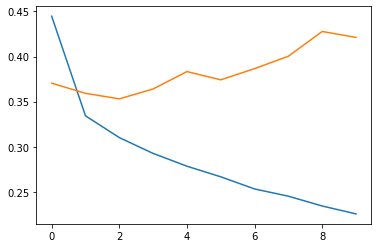

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [10]:
_, accuracy = model.evaluate(x_val_seq, y_val, verbose=0)
accuracy

0.8289999961853027